<a href="https://colab.research.google.com/github/GUNWOOOH/ADP_Practice/blob/main/(%EA%B1%B4%EC%9A%B0)Robust%2C%20Quantile%2C%20Other%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

○ 회귀분석 

회귀 모델을 한 마디로 정의하면 ‘어떤 자료에 대해서 그 값에 영향을 주는 조건을 고려하여 구한 평균’ 입니다. 통계학적인 관점에서 보면 모든 데이터는 아래와 같은 수식으로 표현할 수 있다고 가정

고전적 선형 회귀 모델은 독립 변수의 개수에 따라 아래와 같이 명칭을 구분하기도 합니다.

단순 선형 회귀 (simple linear regression): 독립 변수가 하나
다중 선형 회귀 (multiple linear regression): 독립 변수가 둘 이상
고전적 선형 회귀 모델은 형태가 단순한만큼 데이터에 대해 많은 가정을 갖고 있습니다.

● 오차항은 평균이 0이고 분산이 일정한 정규 분포를 갖는다.

● 독립변수와 종속변수는 선형 관계이다.

● 오차항은 자기 상관성이 없다.

● 데이터에 아웃라이어가 없다.

● 독립변수와 오차항은 서로 독립이다.

● 독립변수 간에서는 서로 선형적으로 독립이다.

따라서 만약 실제 데이터가 이런 가정을 충족하지 않는다면, 고전적 선형 회귀 모델은 실제 데이터를 정확히 반영하지 못하게 되므로 다른 방법을 사용해야 합니다. 일반적으로 알려진 가이드라인은 다음과 같습니다.

● 독립 변수와 종속 변수가 선형 관계가 아닌 경우: Polynomial regression, Generalized Additive Model (GAM)

● 오차항의 확률분포가 정규분포가 아닌 경우: Generalized Linear Model (GLM)

● 오차항에 자기 상관성이 있는 경우: Auto-regression

● 데이터에 아웃라이어가 있는 경우: Robust regression, Quantile regression

● 독립변수 간에 상관성이 있는 경우(다중공선성): Ridge regression, Lasso regression, Elastic Net regression, Principal Component Regression (PCR), Partial Least Square (PLS) regression

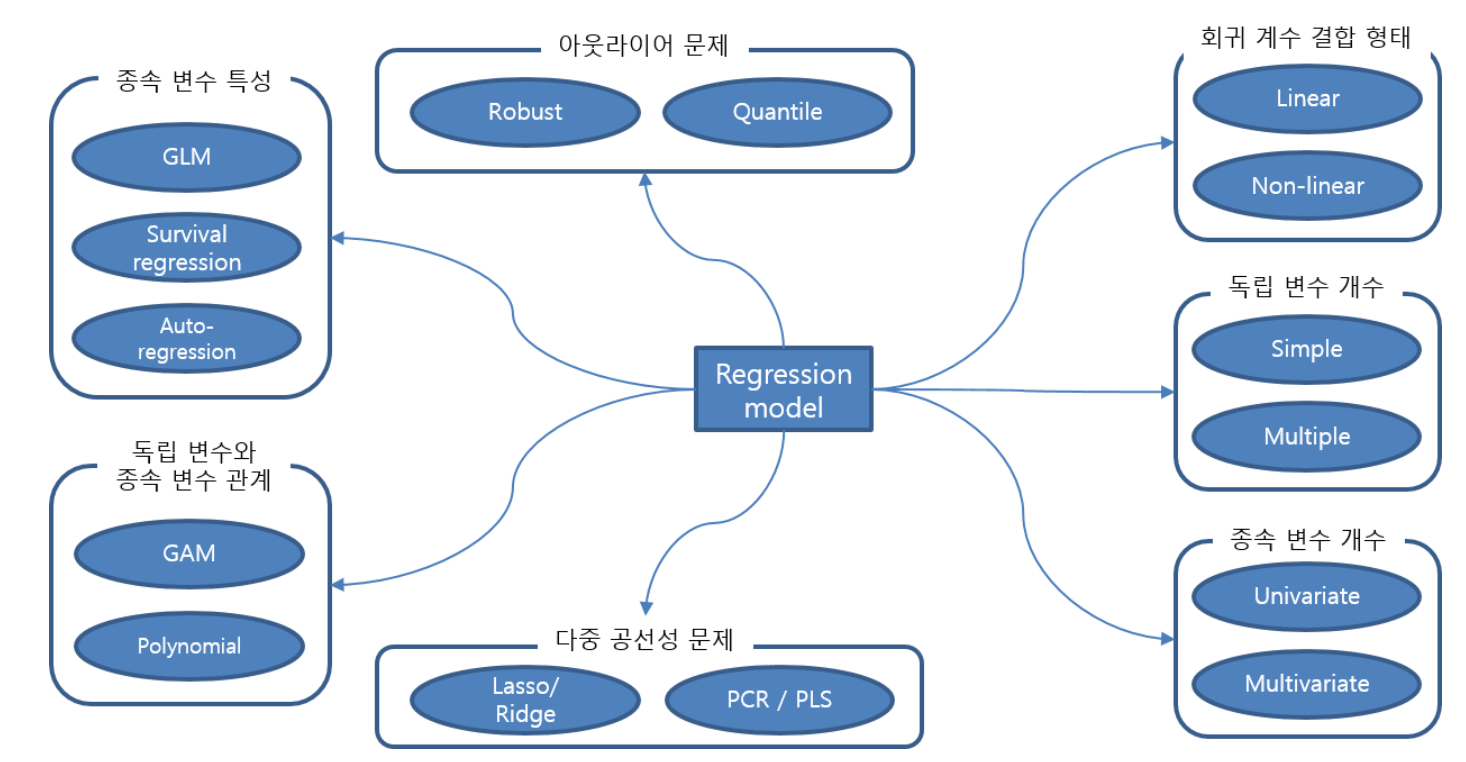

In [ ]:
import pandas as pd
import csv

file_path  = "https://raw.githubusercontent.com/sonarsushant/California-House-Price-Prediction/master/housing.csv"
housing = pd.read_csv(file_path)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


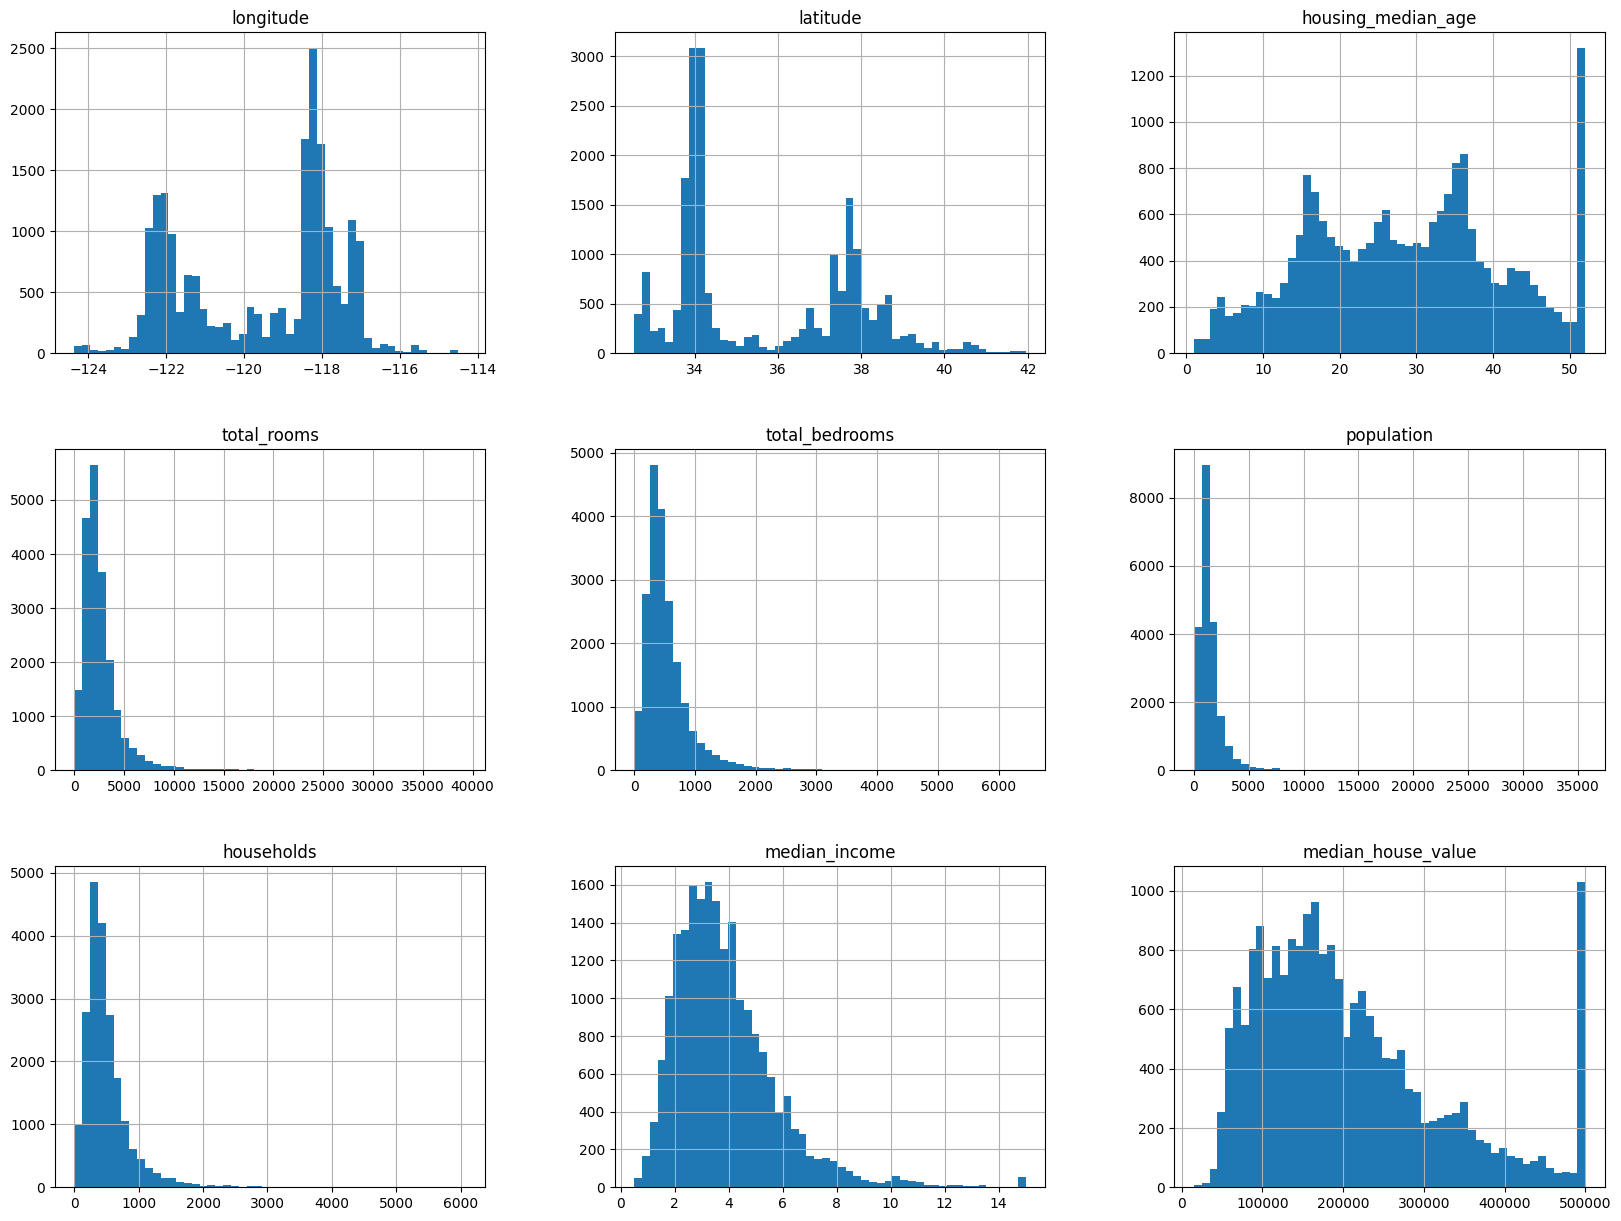

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.savefig(f'./histogram.jpg')
plt.show()


In [ ]:
import numpy as np

def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data)*test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
len(train_set)
len(test_set)

4128

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state = 42)

<Axes: xlabel='longitude', ylabel='latitude'>

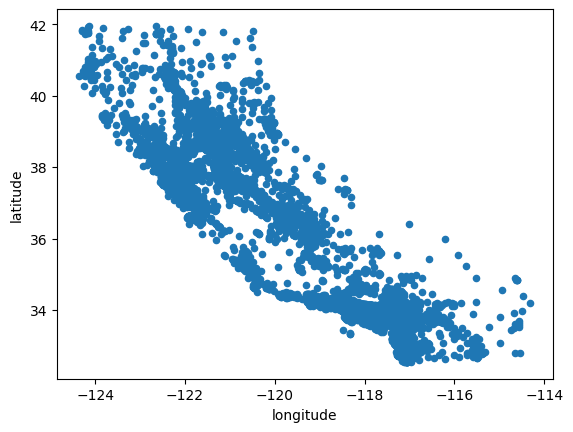

In [ ]:
train_set.plot(kind="scatter", x="longitude", y="latitude")

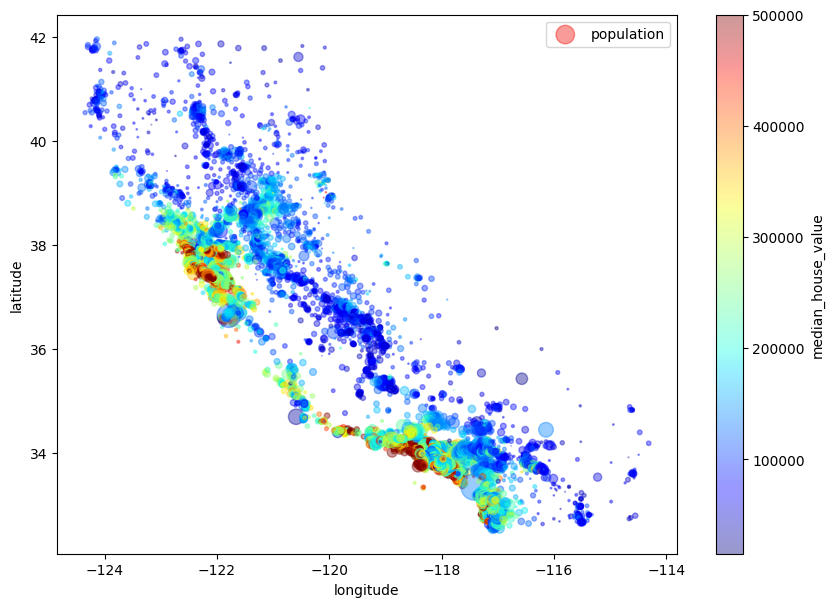

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

plt.legend()

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

<ipython-input-11-51a0e6bf2eb4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

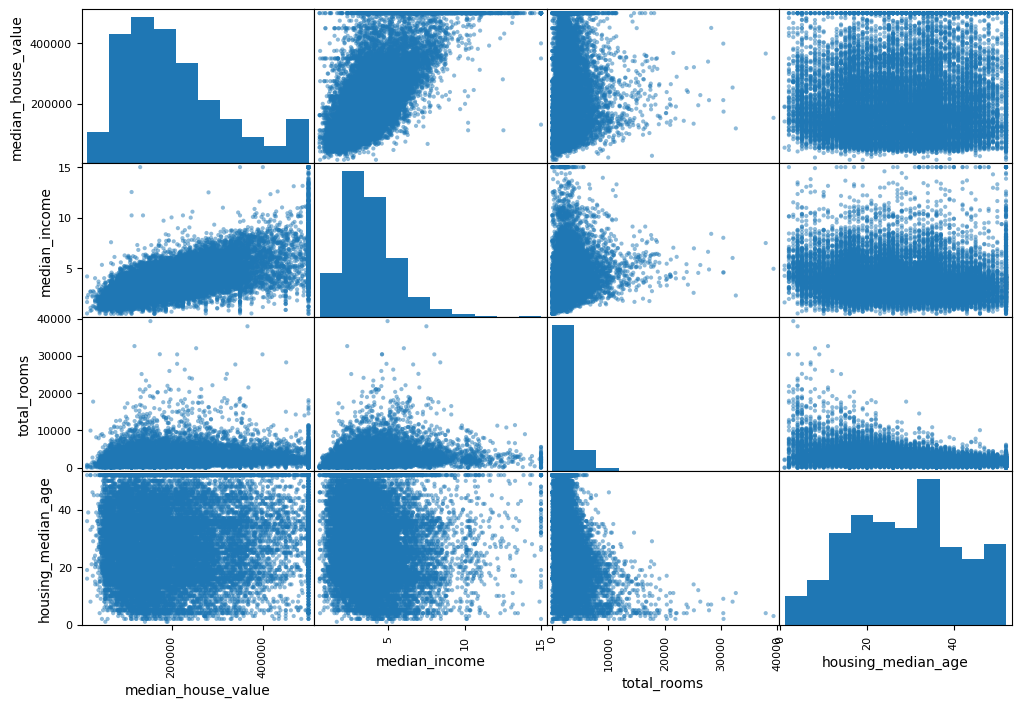

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.savefig(r"mat_img.png")

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

<ipython-input-14-51a0e6bf2eb4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [ ]:
housing = train_set.drop("median_house_value",axis = 1)
housing_label = train_set["median_house_value"].copy()

In [ ]:
#housing.dropna(subset=["total_bedrooms"]) #na행 제거
#housing.drop("total_bedrooms", axis=1) #na가 있는 변수 제거
median = housing["total_bedrooms"].median() #median 대체
housing["total_bedrooms"].fillna(median, inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns = housing_num.columns)


In [ ]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns = housing_num.columns)


In [ ]:
housing_cat = housing[["ocean_proximity"]]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
housing_cat = housing[["ocean_proximity"]]
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[4.],
       [4.],
       [4.],
       [4.],
       [1.],
       [0.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num",num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])
housing_prepared = full_pipeline.fit_transform(housing)

#linear Reg

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_label)

from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_label, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68433.93736666226

#DecisionTreeReg

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_label)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_label, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_label,
                         scoring = "neg_mean_squared_error", cv=10)
tree_rmse_score = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
  print("Scores", scores)
  print("Mean", scores.mean())
  print("Standard deviation:", scores.std())

display_scores(tree_rmse_score)

Scores [65770.16015174 69839.34085218 68281.95762463 71720.99014695
 69133.37713578 66987.24757666 64192.0382125  69858.50127337
 69176.9777425  67910.49461005]
Mean 68287.10853263526
Standard deviation: 2076.401073547878


In [ ]:
lin_scores = cross_val_score(lin_reg,housing_prepared, housing_label,
                             scoring = "neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores [65581.45520649 71711.35784404 68143.02388491 66855.55244479
 69440.38017435 65640.36503235 65861.37192245 69898.33048393
 73117.94692191 69704.17693297]
Mean 68595.39608481781
Standard deviation: 2496.5245371674637


#RandomforestReg

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_label)
housing_predictions = forest_reg.predict(housing_prepared)
forest_rmse = mean_squared_error(housing_label, housing_predictions)

In [ ]:
np.sqrt(forest_rmse)

18112.512887189707

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [{'n_estimators':[3,10,30], 'max_features': [2,4,6,8]},
              {'bootstrap':[False], 'n_estimators': [3,10], 'max_features':[2,3,4]}]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',
                           return_train_score = True)

grid_search.fit(housing_prepared, housing_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
  print(np.sqrt(-mean_score), params)

63568.9573102329 {'max_features': 2, 'n_estimators': 3}
54534.08706653831 {'max_features': 2, 'n_estimators': 10}
52102.705523303994 {'max_features': 2, 'n_estimators': 30}
59289.06187985106 {'max_features': 4, 'n_estimators': 3}
52591.741106842 {'max_features': 4, 'n_estimators': 10}
50240.36605852522 {'max_features': 4, 'n_estimators': 30}
58429.161331085386 {'max_features': 6, 'n_estimators': 3}
52189.827795275036 {'max_features': 6, 'n_estimators': 10}
49776.31960555985 {'max_features': 6, 'n_estimators': 30}
58201.24722450692 {'max_features': 8, 'n_estimators': 3}
51634.863175803235 {'max_features': 8, 'n_estimators': 10}
49661.813422375584 {'max_features': 8, 'n_estimators': 30}
62024.83234238131 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54086.69005538257 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59480.34586817444 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52061.110618189516 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [ ]:
final_model = grid_search.best_estimator_
X_test = test_set.drop("median_house_value",axis=1)
y_test = test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

49712.9860399532

#Rubust Regression

 - Huber regression : Huber regression is an example of a robust regression algorithm that assigns less weight to observations identified as outliers.

 - RANSAC regression: Random sample consensus (RANSAC) regression is a non-deterministic algorithm that tries to separate the training data into inliers (which may be subject to noise) and outliers. Then, it estimates the final model only using the inliers.

 - Theil-Sen regression: The last of the robust regression algorithms available in scikit-learn is the Theil-Sen regression. It is a non-parametric regression method, which means that it makes no assumption about the underlying data distribution. In short, it involves fitting multiple regression models on subsets of the training data and then aggregating the coefficients at the last step.

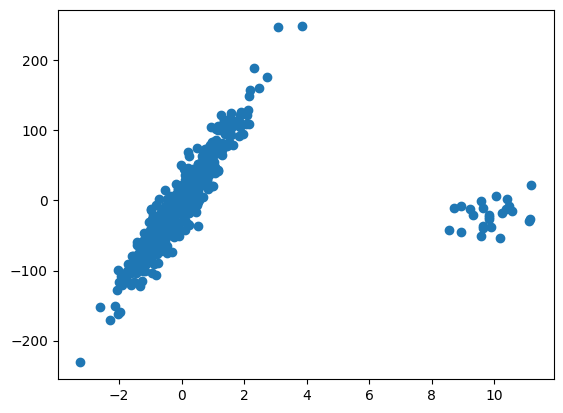

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import (LinearRegression, HuberRegressor,
                              	  RANSACRegressor, TheilSenRegressor)


N_SAMPLES = 500
N_OUTLIERS = 25

X, y, coef = datasets.make_regression(
    n_samples=N_SAMPLES, 
    n_features=1, 
    n_informative=1, 
    noise=20, 
    coef=True, 
    random_state=42
)

coef_list = [["original_coef", float(coef)]]

# add outliers               
np.random.seed(42)
X[:N_OUTLIERS] = 10 + 0.75 * np.random.normal(size=(N_OUTLIERS, 1))
y[:N_OUTLIERS] = -15 + 20 * np.random.normal(size=N_OUTLIERS)

plt.scatter(X, y);



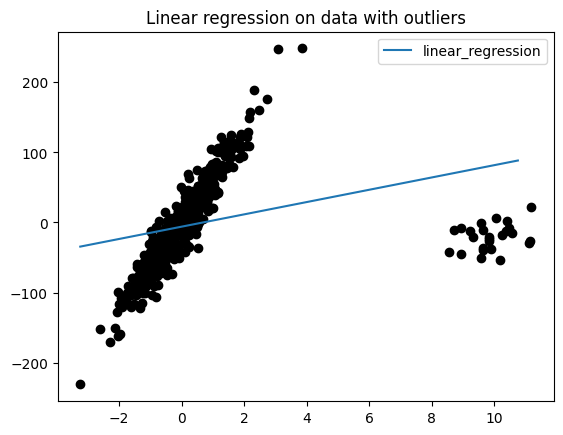

In [ ]:
lr = LinearRegression().fit(X, y)
coef_list.append(["linear_regression", lr.coef_[0]])

plotline_X = np.arange(X.min(), X.max()).reshape(-1, 1)

fit_df = pd.DataFrame(
    index = plotline_X.flatten(),
    data={"linear_regression": lr.predict(plotline_X)}
)


fix, ax = plt.subplots()
fit_df.plot(ax=ax)
plt.scatter(X, y, c="k")
plt.title("Linear regression on data with outliers");

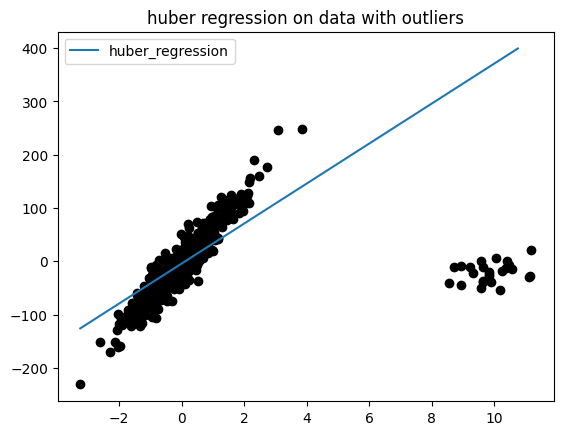

In [ ]:
#Huber

huber = HuberRegressor().fit(X, y)
fit_df["huber_regression"] = huber.predict(plotline_X)
coef_list.append(["huber_regression", huber.coef_[0]])

fit_df = pd.DataFrame(
    index = plotline_X.flatten(),
    data={"huber_regression": huber.predict(plotline_X)}
)

fix, ax = plt.subplots()
fit_df.plot(ax=ax)
plt.scatter(X, y, c="k")
plt.title("huber regression on data with outliers");

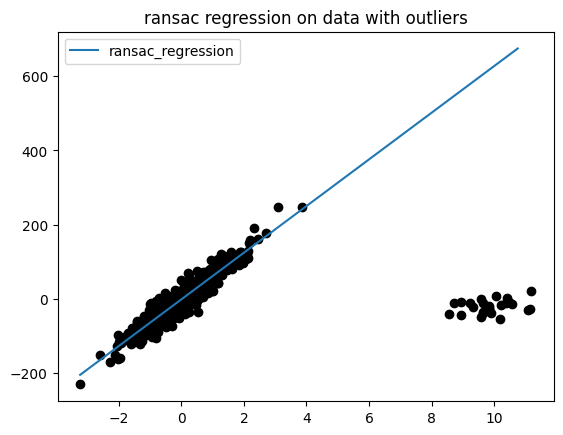

In [ ]:
#Ransac

ransac = RANSACRegressor(random_state=42).fit(X, y)
fit_df["ransac_regression"] = ransac.predict(plotline_X)
ransac_coef = ransac.estimator_.coef_
coef_list.append(["ransac_regression", ransac.estimator_.coef_[0]])


fit_df = pd.DataFrame(
    index = plotline_X.flatten(),
    data={"ransac_regression": ransac.predict(plotline_X)}
)

fix, ax = plt.subplots()
fit_df.plot(ax=ax)
plt.scatter(X, y, c="k")
plt.title("ransac regression on data with outliers");

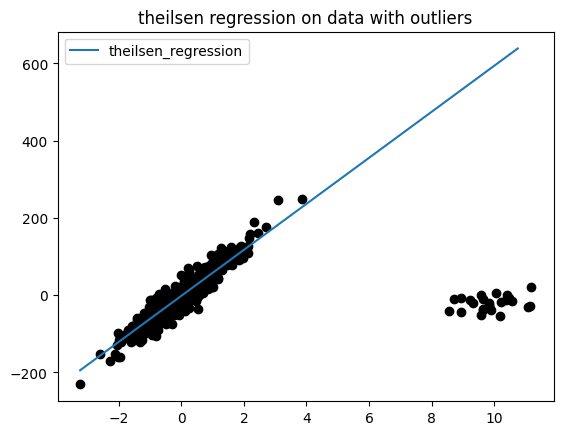

In [ ]:
#theilsen

theilsen = TheilSenRegressor(random_state=42).fit(X, y)
fit_df["theilsen_regression"] = theilsen.predict(plotline_X)
coef_list.append(["theilsen_regression", theilsen.coef_[0]])


fit_df = pd.DataFrame(
    index = plotline_X.flatten(),
    data={"theilsen_regression": theilsen.predict(plotline_X)}
)

fix, ax = plt.subplots()
fit_df.plot(ax=ax)
plt.scatter(X, y, c="k")
plt.title("theilsen regression on data with outliers");

#Quantile Regression

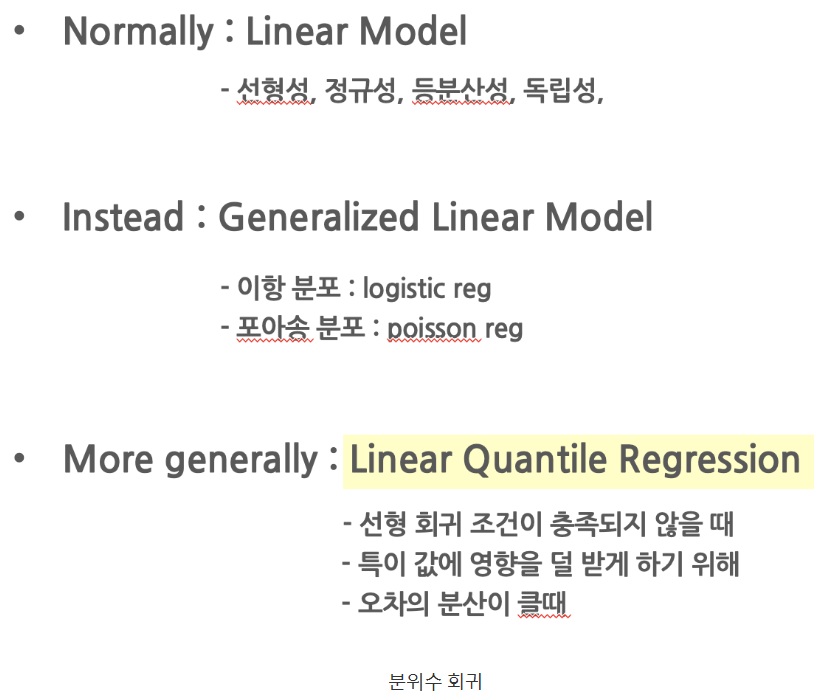

Text(0.5, 1.0, 'Data with constant variance')

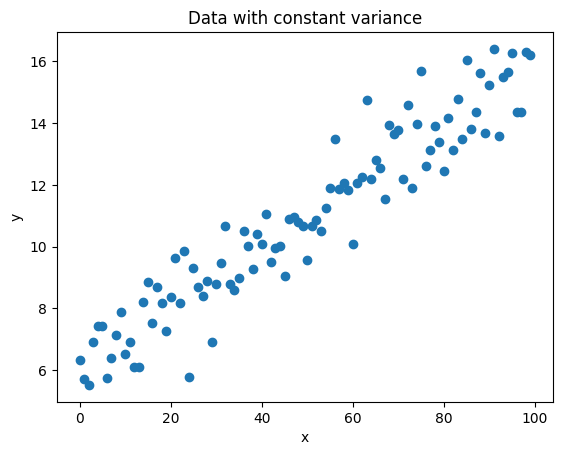

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt   
## Generate some data with constant variance /noise 
x = np.arange(100).reshape(100,1) 
intercept_ = 6 
slope_ = 0.1 
## non constant error 
error_ = np.random.normal(size = (100,1), loc = 0.0, scale = 1)
## Regression equation 

y = intercept_ + slope_ * x + error_  
plt.figure(1) 
plt.scatter(x, y) 
plt.xlabel("x") 
plt.ylabel("y") 
plt.title("Data with constant variance")

Mean squared error: 0.88
Variance score: 0.90


Text(0.5, 1.0, 'Linear regression')

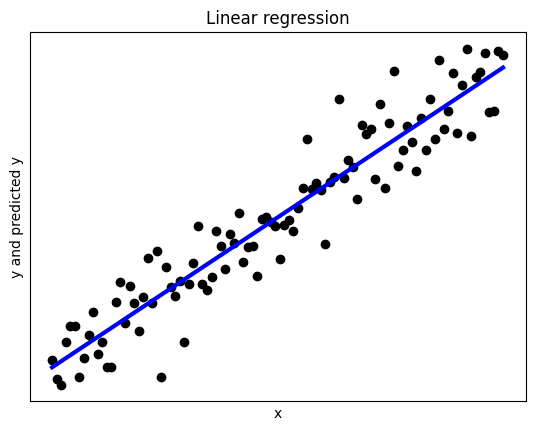

In [ ]:
## Let us do a least square regression on the above dataset 
from sklearn.linear_model import LinearRegression  

model1 = LinearRegression() 
model1.fit(x, y)  
y_pred1 = model1.predict(x)  
print("Mean squared error: {0:.2f}"       .format(np.mean((y_pred1 - y) ** 2))) 
print('Variance score: {0:.2f}'.format(model1.score(x, y))) 

## Plot the regression 

plt.figure(2) 
plt.scatter(x, y,  color='black') 
plt.plot(x, y_pred1, color='blue',          linewidth=3)  
plt.xticks(()) 
plt.yticks(()) 
plt.xlabel("x") 
plt.ylabel("y and predicted y") 
plt.title("Linear regression")

Text(0.5, 1.0, 'Data with non-constant variance')

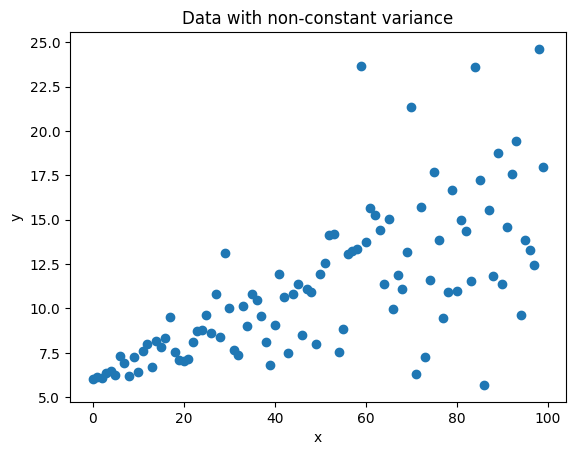

In [ ]:
## Generate some data with non-constant variance 

x_ = np.arange(100).reshape(100,1) 

intercept_ = 6 
slope_ = 0.1 

## Non constant variance 

var_ = 0.1 + 0.05 * x_ 

## non constant error 

error_ = np.random.normal(size = (100,1), loc = 0.0, scale = var_) 

## Regression equation 

y_ = intercept_ + slope_ * x + error_  

plt.figure(3) 
plt.scatter(x_, y_) 
plt.xlabel("x") 
plt.ylabel("y") 
plt.title("Data with non-constant variance")

Mean squared error: 9.10
Variance score: 0.47


Text(0.5, 1.0, 'Linear regression on data with non-constant variance')

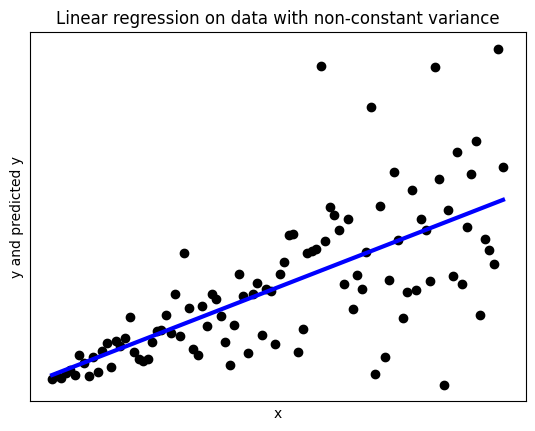

In [ ]:
## Try to fit a linear regression 
model2 = LinearRegression() 
model2.fit(x_, y_)  
y_pred2 = model2.predict(x_)  
print("Mean squared error: {0:.2f}"       .format(np.mean((y_pred2 - y_) ** 2))) 
print('Variance score: {0:.2f}'.format(model1.score(x_, y_)))  

## Plot the regression plt.figure(4) 
plt.scatter(x_, y_,  color='black') 
plt.plot(x_, y_pred2, color='blue',          linewidth=3)  
plt.xticks(()) 
plt.yticks(()) 
plt.xlabel("x") 
plt.ylabel("y and predicted y") 
plt.title("Linear regression on data with non-constant variance")

In [ ]:
## Quantile regression for the median, 0.5th quantile 

import pandas as pd  
data = pd.DataFrame(data = np.hstack([x_, y_]), columns = ["x", "y"]) 
import statsmodels.formula.api as smf   

mod = smf.quantreg('y ~ x', data) 
res = mod.fit(q=.5) 
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3697
Model:                       QuantReg   Bandwidth:                       2.171
Method:                 Least Squares   Sparsity:                        5.751
Date:                Thu, 01 Jun 2023   No. Observations:                  100
Time:                        12:58:07   Df Residuals:                       98
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0754      0.571     10.644      0.000       4.943       7.208
x              0.1031      0.010     10.352      0.000       0.083       0.123


In [ ]:
## Build the model for other quantiles 

quantiles = np.arange(0.1,1,0.1)
models = [] 
params = []  

for qt in quantiles:  
  res = mod.fit(q = qt )    
  models.append(res)    
  params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())   
  params = pd.DataFrame(data = params, columns = ['qt','intercept','x_coef','cf_lower_bound','cf_upper_bound'])  
  print(params)

    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1   6.012567  0.040262        0.018625          0.0619
    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1   6.012567  0.040262        0.018625          0.0619
    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1   6.012567  0.040262        0.018625          0.0619
    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1   6.012567  0.040262        0.018625          0.0619
    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1   6.012567  0.040262        0.018625          0.0619
    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1   6.012567  0.040262        0.018625          0.0619
    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1   6.012567  0.040262        0.018625          0.0619


<ipython-input-22-c502d25f52b4>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())
<ipython-input-22-c502d25f52b4>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())
<ipython-input-22-c502d25f52b4>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())
<ipython-input-22-c502d25f52b4>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params.append([qt, res.pa

    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1   6.012567  0.040262        0.018625          0.0619
    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1   6.012567  0.040262        0.018625          0.0619


<ipython-input-22-c502d25f52b4>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())


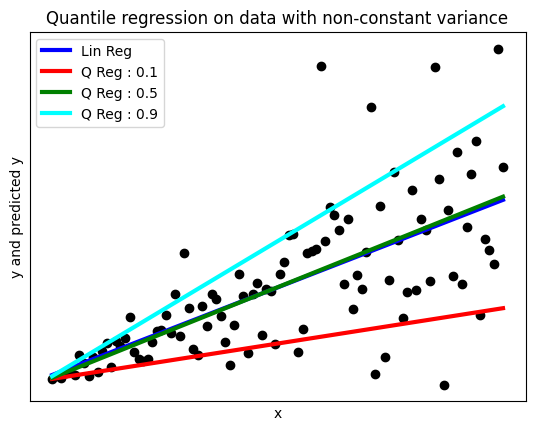

In [ ]:
plt.figure(5) 
plt.scatter(x_, y_,  color='black') 
plt.plot(x_, y_pred2, color='blue',          linewidth=3, label='Lin Reg')  
y_pred3 = models[0].params['Intercept'] + models[0].params['x'] * x_ 
plt.plot(x_, y_pred3, color='red',          linewidth=3, label='Q Reg : 0.1')  
y_pred4 = models[4].params['Intercept'] + models[4].params['x'] * x_ 
plt.plot(x_, y_pred4, color='green',          linewidth=3, label='Q Reg : 0.5')   
y_pred5 = models[8].params['Intercept'] + models[8].params['x'] * x_ 
plt.plot(x_, y_pred5, color='cyan',          linewidth=3, label='Q Reg : 0.9')   
plt.xticks(()) 
plt.yticks(())
plt.xlabel("x") 
plt.ylabel("y and predicted y") 
plt.title("Quantile regression on data with non-constant variance") 
plt.legend()

#릿지 라쏘



In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

NameError: ignored